(5744, 7269)
  (0, 2512)	1
  (0, 5977)	1
  (0, 2411)	1
  (0, 6733)	1
tf-idf result
(5744, 7269)
  (0, 6733)	0.24793712252482222
  (0, 5977)	0.5776178098592758
  (0, 2512)	0.5662957739685502
  (0, 2411)	0.5330984387454585
random sampling X- train_test label
(4020, 7269)
(1724, 7269)
random sampling X - learning result
accuracy: 0.78
Precision: 0.833
Recall: 0.149
F1: 0.253
random sampling X - Confusion_matrix
[[  65  371]
 [  13 1275]]
random sampling X - number of y on 0, 1
2    4346
1    1398
Name: y, dtype: int64
random sampling O - train_test label
(1400, 7269)
(600, 7269)
random sampling O - learning result
accuracy: 0.68
Precision: 0.709
Recall: 0.545
F1: 0.617
random sampling O - Confusion_matrix
[[156 130]
 [ 64 250]]
[(1.8378247637152731, 678), (1.1664233000573632, 4402), (1.0932332617559701, 6848), (1.0207613154766986, 6971), (0.9446254250153798, 623)]
[(-1.4154388327940313, 2328), (-1.433550197702407, 4563), (-1.4340830748873068, 5634), (-1.4722722914779185, 5130), (-1.717021

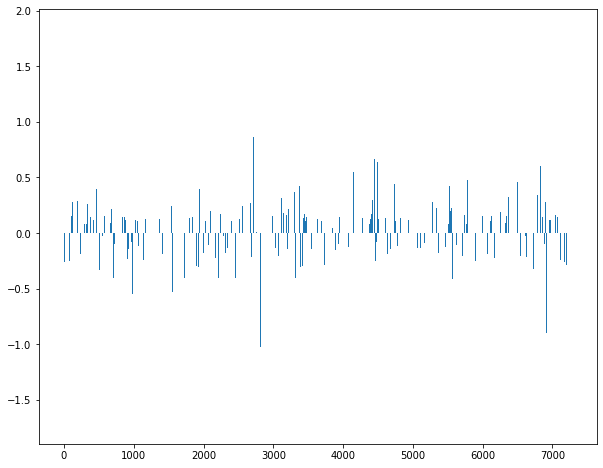

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("C:/Users/wngus/Documents/GitHub/opinion_mining/opm/words2.csv", encoding='cp949')


# corpus index 생성
index_vectorizer = CountVectorizer() # 토큰화, 벡터화를 같이 해줌
X = index_vectorizer.fit_transform(df['okt_verb']) # 토큰화 이미 해놨으니까 그냥 해놓은거 넣기만 하면 됨
# (5744, 7269) :  7269의 feature를 가진 5744개의 학습 데이터 셋 

print(X.shape)
print(X[1])
print('===================================================')

# TF-IDF
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print('tf-idf result')
print(X.shape)
print(X[1])

#X: tf-idf 처리 한 단어 결과, 데이터, 레이블 전부 포함, test는 30%만 사용
#test용 데이터셋 분리
print("random sampling X- train_test label")
y=df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)

# 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling X - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


#Confusion Matrix 출력
print("random sampling X - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#y가 0과 1을 얼마나 가지고 있는지 출력(클래스 불균형 문제 해결을 위함)
print("random sampling X - number of y on 0, 1")
print(df['y'].value_counts())



print('===================================================')
#1:1 비율로 랜덤 샘플링 수행
# y가 1,2인 샘플 중 50개를 임의로 추출해서 비율을 맞춰줌
positive_random_idx = df[df['y']==1].sample(1000,random_state=30).index.tolist()
negative_random_idx = df[df['y']==2].sample(1000,random_state=30).index.tolist()

#랜덤 데이터로 데이터셋을 나눔
# test는 30%, train 70%
print("random sampling O - train_test label")
random_idx = positive_random_idx+negative_random_idx
sample_X=X[random_idx,:]
y= df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size = 0.30)
print(x_train.shape)
print(x_test.shape)

#데이터를 다시 정제한 후 모델 학습 재진행
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling O - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

#Confusion Matrix 출력
print("random sampling O - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#학습한 모델의 계수를 출력하여 피처 영향력을 확인
# 양수인 것들은 트윗에서 긍정적이라고 판단되는 단어, 음수는 트윗에서 부정적이라고 판단되는 단어라고 판단함.
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

#회귀 모델의 계수를 높은 순으로 정렬
# 긍정 단어와 부정 단어를 출력하기 위해 계수를 기준으로 단어를 정렬하고, 정렬된 벡터를 index_vectorizer 객체에 다시 결과 맵핑
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),reverse=True)

#회귀 모델의 계수를 index_vec에 맵핑하여 어떤 형태소인지 출력할 수 있게 함
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

#계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력
print(str(invert_index_vectorizer)[:100]+'..')

print("Positive top 20")
#계수가 높은 feature는 립에 긍정적인 영향을 주는 형태소
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

print("Negative top 20==========")
#계수가 높은 feature는 립에 부정적인 영향을 주는 형태소
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]],coef[0])